<a href="https://colab.research.google.com/github/daniswara10/EMGclassificationwithCNN/blob/main/EMGClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import random
import csv
import numpy as np

In [2]:
project_dataset_dir = '/content/EMG-data.csv'
df = pd.read_csv(project_dataset_dir)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274120 entries, 0 to 274119
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      274120 non-null  int64  
 1   channel1  274120 non-null  float64
 2   channel2  274120 non-null  float64
 3   channel3  274119 non-null  float64
 4   channel4  274119 non-null  float64
 5   channel5  274119 non-null  float64
 6   channel6  274119 non-null  float64
 7   channel7  274119 non-null  float64
 8   channel8  274119 non-null  float64
 9   class     274119 non-null  float64
 10  label     274119 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 23.0 MB


In [4]:
df.drop('time', inplace=True, axis=1)

df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1.0
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0.0,1.0
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0.0,1.0


In [5]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274120 entries, 0 to 274119
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   channel1  274120 non-null  float64
 1   channel2  274120 non-null  float64
 2   channel3  274119 non-null  float64
 3   channel4  274119 non-null  float64
 4   channel5  274119 non-null  float64
 5   channel6  274119 non-null  float64
 6   channel7  274119 non-null  float64
 7   channel8  274119 non-null  float64
 8   class     274119 non-null  float64
 9   label     274119 non-null  float64
dtypes: float64(10)
memory usage: 20.9 MB


274120

In [6]:
df.isna().sum() # check null dataset

,0
channel1,0
channel2,0
channel3,1
channel4,1
channel5,1
channel6,1
channel7,1
channel8,1
class,1
label,1


In [7]:
print(df['class'].value_counts())

class
0.0    184618
1.0     16157
3.0     15859
2.0     15244
6.0     14515
5.0     13931
4.0     13795
Name: count, dtype: int64


In [8]:
df.drop(df[df['class'] == 0].index, inplace=True)

In [9]:
df.head()

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0,1.0
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0


In [10]:
all_labels_present = df.groupby('class')['label'].nunique() == 36
# use .unquniq() == 36 to check if all class have 36 unique label
all_labels_present

,label
class,
1.0,False
2.0,False
3.0,False
4.0,False
5.0,False
6.0,False


In [11]:
# check how many label in class = 7
class_7_data = df[df['class'] == 7]
class_7_label_counts = class_7_data.groupby('label').size().reset_index(name='count')
class_7_label_counts

,label,count


In [12]:
data = df[df['class'] != 7]

In [13]:
data['class'].value_counts()

,count
class,
1.0,16157
3.0,15859
2.0,15244
6.0,14515
5.0,13931
4.0,13795


In [14]:
subjects_data = data.groupby(['label','class'])

In [15]:
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame named df
class_counts = data.groupby('class').size().reset_index(name='count')

print('Class distribution:')
print(class_counts)

Class distribution:
   class  count
0    1.0  16157
1    2.0  15244
2    3.0  15859
3    4.0  13795
4    5.0  13931
5    6.0  14515


In [16]:
data

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class,label
2287,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0,1.0
2288,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2289,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2290,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
2291,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
274115,0.00004,0.00005,0.00014,0.00026,0.00099,0.00051,0.00012,0.00009,4.0,3.0
274116,0.00006,0.00003,0.00021,0.00048,0.00029,0.00101,0.00037,0.00013,4.0,3.0
274117,0.00006,0.00003,0.00021,0.00048,0.00029,0.00101,0.00037,0.00013,4.0,3.0
274118,0.00006,0.00003,0.00021,0.00048,0.00029,0.00101,0.00037,0.00013,4.0,3.0


In [17]:
data.drop('label', inplace=True, axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89502 entries, 2287 to 274119
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   channel1  89502 non-null  float64
 1   channel2  89502 non-null  float64
 2   channel3  89501 non-null  float64
 3   channel4  89501 non-null  float64
 4   channel5  89501 non-null  float64
 5   channel6  89501 non-null  float64
 6   channel7  89501 non-null  float64
 7   channel8  89501 non-null  float64
 8   class     89501 non-null  float64
dtypes: float64(9)
memory usage: 6.8 MB


In [19]:
def normalized(data):
    min_value = np.min(data)
    max_value = np.max(data)
    normalized_data = (data - min_value) / (max_value - min_value)
    return normalized_data

In [20]:
def sliding_window(data, window_size, stride):
    windowed_data = []
    labels = []

    for i in range(0, len(data) - window_size + 1, stride):
        windowed = data.iloc[i:i+window_size, :-1].values  # Etiket sütununu hariç al ve NumPy array'e dönüştür
        label = data.iloc[i+window_size-1, -1]  # Son sütunu etiket olarak kullan
        windowed_data.append(windowed)
        labels.append(label)

    return np.array(windowed_data), np.array(labels)

In [21]:
window_size=150
stride=30
X, Y = sliding_window(data, 150, 30)

In [22]:
X = normalized(X)

In [23]:
Y = Y - 1

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    # Flattening layers
    model.add(Flatten())

    # Full connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [26]:
# define the CNN model
input_shape = X_train.shape[1:]  # set input size
num_classes = len(np.unique(Y))   # set class size

model = CNN_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 148, 32)             │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 74, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 72, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,822 (1.16 MB)

 Trainable params: 302,822 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.1736 - loss: 1.7871 - val_accuracy: 0.4631 - val_loss: 1.6000
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4735 - loss: 1.4747 - val_accuracy: 0.5872 - val_loss: 1.0538
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6007 - loss: 1.0355 - val_accuracy: 0.6258 - val_loss: 1.1530
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6293 - loss: 0.9056 - val_accuracy: 0.6376 - val_loss: 0.8614
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6634 - loss: 0.8512 - val_accuracy: 0.7081 - val_loss: 0.7622
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7255 - loss: 0.7155 - val_accuracy: 0.6997 - val_loss: 0.7723
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7586 - loss: 0.6435 - val_accuracy: 0.6460 - val_loss: 0.8602
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7708 - loss: 0.6314 - val_accuracy: 0.7232 - v

In [28]:
from sklearn.metrics import accuracy_score, f1_score

# make predictions on training data
y_pred_train = model.predict(X_train)
y_pred_train = np.argmax(y_pred_train, axis=1)  # One-hot encoding'den etiketlere dönüştür

# make predictions on test data
y_pred_test = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test, axis=1)  # One-hot encoding'den etiketlere dönüştür

# calculate accuracy
accuracy_training = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# calculate F1 score
f1_training = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("Training Accuracy:", accuracy_training)
print("Test Accuracy:", accuracy_test)
print("Training F1 Score:", f1_training)
print("Test F1 Score:", f1_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Training Accuracy: 0.7637431808644566
Test Accuracy: 0.7164429530201343
Training F1 Score: 0.7559745776930308
Test F1 Score: 0.7035280113215152


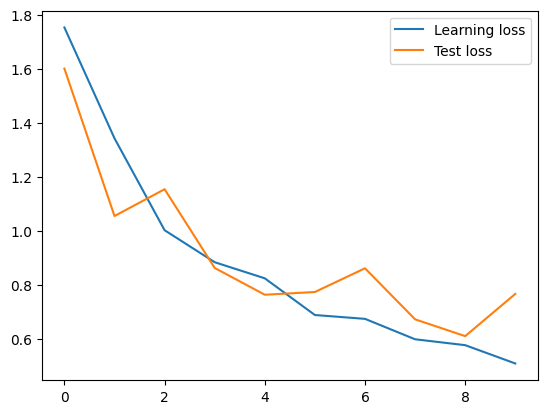

In [29]:
import matplotlib.pyplot as plt

# training and testing loss graph
plt.plot(history.history['loss'], label='Learning loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend()
plt.show()

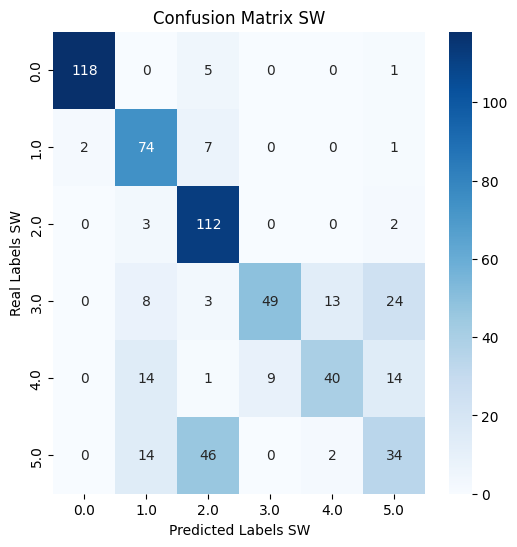

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix SW')
plt.xlabel('Predicted Labels SW')
plt.ylabel('Real Labels SW')
plt.show()

In [31]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor = classification_report(y_test, y_pred_test, target_names=[str(i) for i in np.unique(y_test)])
print(rapor)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97       124
         1.0       0.65      0.88      0.75        84
         2.0       0.64      0.96      0.77       117
         3.0       0.84      0.51      0.63        97
         4.0       0.73      0.51      0.60        78
         5.0       0.45      0.35      0.40        96

    accuracy                           0.72       596
   macro avg       0.72      0.69      0.69       596
weighted avg       0.73      0.72      0.70       596



In [32]:
import numpy as np
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def fourier_transform(X):
    transformed_data = []

    for item in X:
        transformed_item = []
        for channel in item.T:  # transpose the data and apply Fourier transform to each channel separately
            fft_values = fft(channel)
            transformed_item.append(np.abs(fft_values))  # only use amplitude information

        transformed_data.append(np.array(transformed_item))

    return np.array(transformed_data)

In [33]:
# apply fourier transform
transformed_X = fourier_transform(X)

In [34]:
transpoze_X = np.transpose(transformed_X, (0, 2, 1))

In [35]:
# split the data into training and testing sets
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(transpoze_X, Y, test_size=0.2, random_state=42)

In [36]:
# define CNN model
input_shape = X_train_ft.shape[1:]  # set input size
num_classes = len(np.unique(Y))   # set class size

model_ft = CNN_model(input_shape, num_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)                    │ (None, 148, 32)             │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 74, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 72, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 36, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 302,822 (1.16 MB)

 Trainable params: 302,822 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history_ft = model_ft.fit(X_train_ft, y_train_ft, epochs=10, validation_data=(X_test_ft, y_test_ft))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6050 - loss: 1.0329 - val_accuracy: 0.8507 - val_loss: 0.4396
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8526 - loss: 0.4026 - val_accuracy: 0.9262 - val_loss: 0.2626
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9046 - loss: 0.2667 - val_accuracy: 0.8943 - val_loss: 0.3009
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9264 - loss: 0.2207 - val_accuracy: 0.9396 - val_loss: 0.2186
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9395 - loss: 0.1808 - val_accuracy: 0.9446 - val_loss: 0.2061
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9373 - loss: 0.1814 - val_accuracy: 0.9262 - val_loss: 0.2184
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9510 - loss: 0.1476 - val_accuracy: 0.9245 - val_loss: 0.2520
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9390 - loss: 0.1845 - val_accuracy: 0.9430 - v

In [38]:
from sklearn.metrics import accuracy_score, f1_score

# make predictions on training data
y_pred_train_ft = model_ft.predict(X_train_ft)
y_pred_train_ft = np.argmax(y_pred_train_ft, axis=1)  # convert from one-hot encoding to tags

# make predictions on test data
y_pred_test_ft = model_ft.predict(X_test_ft)
y_pred_test_ft = np.argmax(y_pred_test_ft, axis=1)  # convert from one-hot encoding to tags

# calculate accuracy
accuracy_training_ft = accuracy_score(y_train_ft, y_pred_train_ft)
accuracy_test_ft= accuracy_score(y_test_ft, y_pred_test_ft)

# calculate F1 score
f1_training_ft = f1_score(y_train_ft, y_pred_train_ft, average='weighted')
f1_test_ft = f1_score(y_test_ft, y_pred_test_ft, average='weighted')

print("Training Accuracy FT:", accuracy_training_ft)
print("Test Accuracy FT:", accuracy_test_ft)
print("Training F1 Score FT:", f1_training_ft)
print("Test F1 Score FT:", f1_test_ft)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Training Accuracy FT: 0.9727234578262695
Test Accuracy FT: 0.9429530201342282
Training F1 Score FT: 0.9727088284527258
Test F1 Score FT: 0.9430820834328245


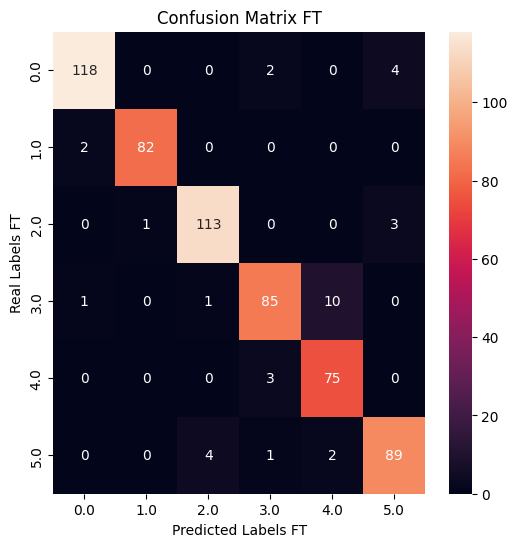

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_ft = confusion_matrix(y_test, y_pred_test_ft)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_ft, annot=True, fmt="d",  xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix FT')
plt.xlabel('Predicted Labels FT')
plt.ylabel('Real Labels FT')
plt.show()

In [40]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor_ft = classification_report(y_test, y_pred_test_ft, target_names=[str(i) for i in np.unique(y_test)])
print(rapor_ft)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       124
         1.0       0.99      0.98      0.98        84
         2.0       0.96      0.97      0.96       117
         3.0       0.93      0.88      0.90        97
         4.0       0.86      0.96      0.91        78
         5.0       0.93      0.93      0.93        96

    accuracy                           0.94       596
   macro avg       0.94      0.94      0.94       596
weighted avg       0.94      0.94      0.94       596



**ROOT MEAN SQUARE CNN 3**

In [41]:
X.shape

(2979, 150, 8)

In [42]:
import numpy as np

# apply RMS
rms_data = np.sqrt(np.mean(np.square(X), axis=1))

In [43]:
rms_data.shape


(2979, 8)

In [44]:
# making data three-dimensional
rms_data = np.expand_dims(rms_data, axis=-1)

In [45]:
rms_data.shape

(2979, 8, 1)

In [46]:
# check the shape
print("Original shape:", X.shape)
print("Shape After RMS Processing:", rms_data.shape)

Original shape: (2979, 150, 8)
Shape After RMS Processing: (2979, 8, 1)


In [47]:
# split the data into trainig and test
X_train_rms, X_test_rms, y_train_rms, y_test_rms = train_test_split(rms_data, Y, test_size=0.2, random_state=42)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

def CNN_model_rms(input_shape, num_classes):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))

    # Flattening Layer
    model.add(Flatten())

    # Full Connected Layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

In [49]:
X_train_rms.shape

(2383, 8, 1)

In [50]:
# define CNN model
input_shape_rms = X_train_rms.shape[1:]  # set input size
num_classes_rms = len(np.unique(Y))   # set class size

model_rms = CNN_model_rms(input_shape_rms, num_classes_rms)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 6, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 1, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,430 (60.27 KB)

 Trainable params: 15,430 (60.27 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_rms = model_rms.fit(X_train_rms, y_train_rms, epochs=10, validation_data=(X_test_rms, y_test_rms))

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1675 - loss: 1.7928 - val_accuracy: 0.2081 - val_loss: 1.7872
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1766 - loss: 1.7918 - val_accuracy: 0.1409 - val_loss: 1.7901
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1569 - loss: 1.7907 - val_accuracy: 0.1963 - val_loss: 1.7874
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1761 - loss: 1.7879 - val_accuracy: 0.1963 - val_loss: 1.7820
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1974 - loss: 1.7861 - val_accuracy: 0.2131 - val_loss: 1.7771
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2300 - loss: 1.7785 - val_accuracy: 0.2181 - val_loss: 1.7614
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2485 - loss: 1.7590 - val_accuracy: 0.2215 - val_loss: 1.7317
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2646 - loss: 1.7182 - val_accuracy: 0.2534 - val_loss

In [52]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on training data
y_pred_train_rms = model_rms.predict(X_train_rms)
y_pred_train_rms = np.argmax(y_pred_train_rms, axis=1)  # One-hot encoding'den etiketlere dönüştür

# Predict on test data
y_pred_test_rms = model_rms.predict(X_test_rms)
y_pred_test_rms = np.argmax(y_pred_test_rms, axis=1)  # One-hot encoding'den etiketlere dönüştür

# calculate accuracy
accuracy_training_rms = accuracy_score(y_train_rms, y_pred_train_rms)
accuracy_test_rms = accuracy_score(y_test_rms, y_pred_test_rms)

# calculate F1 score
f1_training_rms = f1_score(y_train_rms, y_pred_train_rms, average='weighted')
f1_test_rms = f1_score(y_test_rms, y_pred_test_rms, average='weighted')

print("Training Accuracy RMS:", accuracy_training_rms)
print("Test Accuracy RMS:", accuracy_test_rms)
print("Training F1 Score RMS:", f1_training_rms)
print("Test F1 Score RMS:", f1_test_rms)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Accuracy RMS: 0.2790600083927822
Test Accuracy RMS: 0.27348993288590606
Training F1 Score RMS: 0.2082221577260136
Test F1 Score RMS: 0.19978129021574936


In [53]:
from sklearn.metrics import classification_report

# accuracy and F1 score of classes
rapor_rms = classification_report(y_test, y_pred_test_rms, target_names=[str(i) for i in np.unique(y_test)])
print(rapor_rms)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       124
         1.0       0.20      0.31      0.24        84
         2.0       0.26      0.78      0.39       117
         3.0       0.52      0.40      0.45        97
         4.0       0.21      0.09      0.13        78
         5.0       0.00      0.00      0.00        96

    accuracy                           0.27       596
   macro avg       0.20      0.26      0.20       596
weighted avg       0.19      0.27      0.20       596



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


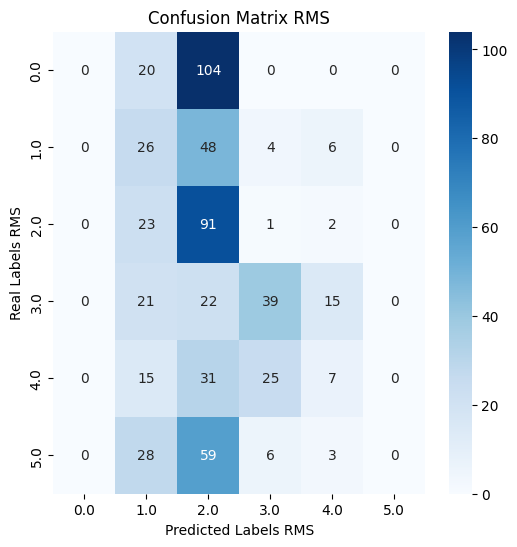

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_rms = confusion_matrix(y_test, y_pred_test_rms)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rms, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix RMS')
plt.xlabel('Predicted Labels RMS')
plt.ylabel('Real Labels RMS')
plt.show()